### Exploratory Data Analysis -- Summary from Reading

1. Single variate versus multivariate
1. Non-graphical versus graphical

#### Single Variate, NonGraphical
* Categorical variables:  frequency counts
* Numeric variables:  sample statistics
  * Central tendency
  * Spread
  * Skew
  * Interquartile range
  
#### Single Variate, Graphical
* Histogram
* Box plots 
* QN plot

#### Multivariate, NonGraphical
* Categorical:  crosstab
* Numeric:  correlation and covariance

#### Multivariate: Graphical
* Side-by-side boxplot
* Scatter plot



In [2]:
import pandas as pd

In [3]:
users = pd.read_table('user.tbl', sep='|')

In [4]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [5]:
users.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [ ]:
## Frequency counts for categorical variables

In [6]:
users.gender.value_counts()

M    670
F    273
Name: gender, dtype: int64

In [9]:
users.occupation.value_counts(sort=True)

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [12]:
users.occupation.value_counts().sort_index()

administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: occupation, dtype: int64

In [13]:
users.occupation.value_counts(normalize=True)

student          0.207847
other            0.111347
educator         0.100742
administrator    0.083775
engineer         0.071050
programmer       0.069989
librarian        0.054083
writer           0.047720
executive        0.033934
scientist        0.032874
artist           0.029692
technician       0.028632
marketing        0.027572
entertainment    0.019088
healthcare       0.016967
retired          0.014846
salesman         0.012725
lawyer           0.012725
none             0.009544
homemaker        0.007423
doctor           0.007423
Name: occupation, dtype: float64

In [14]:
type(users.occupation.value_counts())

pandas.core.series.Series

In [16]:
users.occupation.value_counts(normalize=True).apply(lambda n: "{:.2%}".format(n))

student          20.78%
other            11.13%
educator         10.07%
administrator     8.38%
engineer          7.10%
programmer        7.00%
librarian         5.41%
writer            4.77%
executive         3.39%
scientist         3.29%
artist            2.97%
technician        2.86%
marketing         2.76%
entertainment     1.91%
healthcare        1.70%
retired           1.48%
salesman          1.27%
lawyer            1.27%
none              0.95%
homemaker         0.74%
doctor            0.74%
Name: occupation, dtype: object

In [17]:

users.occupation.value_counts(normalize=True).index

Index(['student', 'other', 'educator', 'administrator', 'engineer',
       'programmer', 'librarian', 'writer', 'executive', 'scientist', 'artist',
       'technician', 'marketing', 'entertainment', 'healthcare', 'retired',
       'salesman', 'lawyer', 'none', 'homemaker', 'doctor'],
      dtype='object')

In [20]:
 #  Finally, make it look tabular by creating a data frame with 
#  Index, then counts, then percentage
pd.DataFrame({'frequency': users.occupation.value_counts(), 
               'percentage': users.occupation.value_counts(normalize=True).apply(lambda n: "{:.2%}".format(n))})

,frequency,percentage
student,196,20.78%
other,105,11.13%
educator,95,10.07%
administrator,79,8.38%
engineer,67,7.10%
programmer,66,7.00%
librarian,51,5.41%
writer,45,4.77%
executive,32,3.39%
scientist,31,3.29%


Sample statistics for quantitative variables

```
Standard Error of Mean. A measure of how much the value of the mean may vary from sample to sample taken from the same distribution. It can be used to roughly compare the observed mean to a hypothesized value (that is, you can conclude the two values are different if the ratio of the difference to the standard error is less than -2 or greater than +2).
```
```
Skewness. A measure of the asymmetry of a distribution. The normal distribution is symmetric and has a skewness value of 0. A distribution with a significant positive skewness has a long right tail. A distribution with a significant negative skewness has a long left tail. As a guideline, a skewness value more than twice its standard error is taken to indicate a departure from symmetry.
```

In [26]:
(users.age.mean(), users.age.median(), users.age.std(), users.age.sem(), users.age.skew())

(34.05196182396607,
 31.0,
 12.192739733059044,
 0.3970502346848901,
 0.6053815216208658)

In [32]:
users.age.quantile([.25, .50, .75])

0.25    25.0
0.50    31.0
0.75    43.0
Name: age, dtype: float64

In [30]:
from scipy.stats import iqr
iqr(users.age)

18.0

#### Graphics for Univariate Attributes

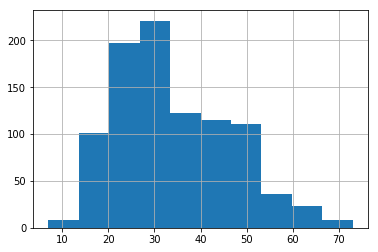

In [28]:
users.age.hist();

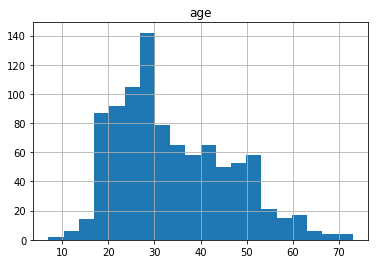

In [36]:
users.hist(column='age', bins=20);

In [ ]:
users.gender.hist()

Boxplots and Friends


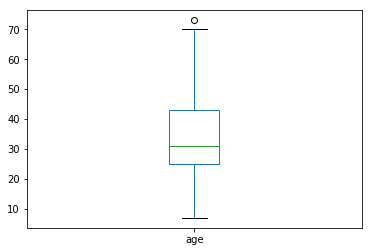

In [41]:
users.age.plot(kind='box')

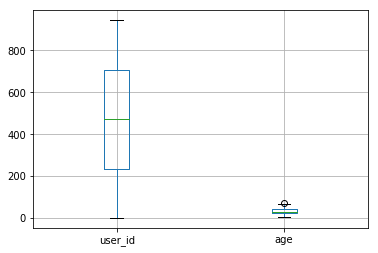

In [42]:
users.boxplot()

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

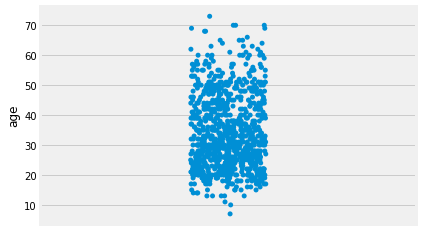

In [44]:
sns.stripplot(y=users.age)

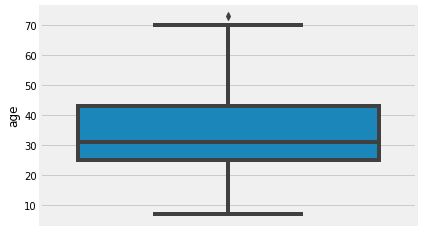

In [45]:
sns.boxplot(y=users.age)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


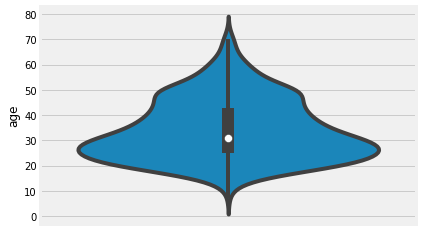

In [46]:
sns.violinplot(users.age,orient="v")

In [6]:
# Drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
types = {'country': str, 'beer': int, 'spirit': int, 'wine': int, 'liters': float, 'continent': str}
drinks = pd.read_csv('drinks.csv', header=0, names=drink_cols, dtype=types)

In [17]:
drinks.rename(columns={'liters': 'total_alcohol'}).describe()

,beer,spirit,wine,total_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [18]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country      193 non-null object
beer         193 non-null int32
spirit       193 non-null int32
wine         193 non-null int32
liters       193 non-null float64
continent    170 non-null object
dtypes: float64(1), int32(3), object(2)
memory usage: 6.9+ KB


In [49]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


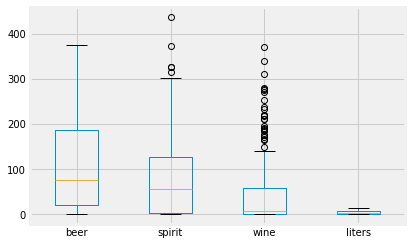

In [50]:
drinks.boxplot()

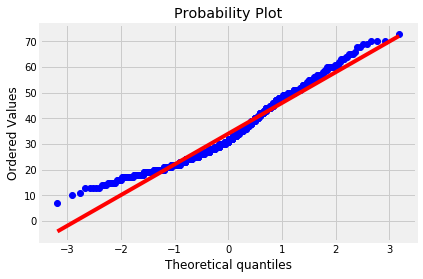

In [51]:
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(users.age, dist="norm", plot=pylab)
pylab.show()

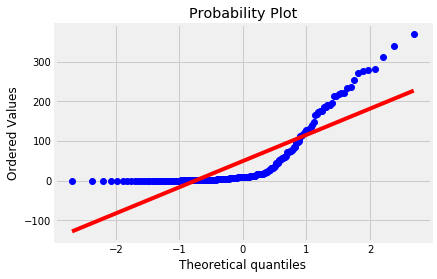

In [54]:
stats.probplot(drinks.wine, dist="norm", plot=pylab)
pylab.show()

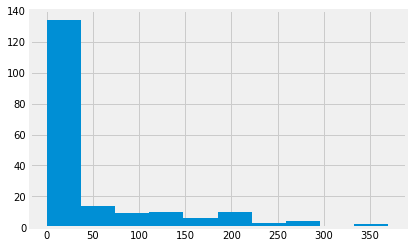

In [55]:
drinks.wine.hist()

#### Multivariate Non-Graphical


In [57]:
pd.crosstab(users.occupation, users.gender)

gender,F,M
occupation,,
administrator,36,43
artist,13,15
doctor,0,7
educator,26,69
engineer,2,65
entertainment,2,16
executive,3,29
healthcare,11,5
homemaker,6,1


In [4]:
pd.crosstab(users.occupation, users.gender, margins=True)

gender,F,M,All
occupation,,,
administrator,36,43,79
artist,13,15,28
doctor,0,7,7
educator,26,69,95
engineer,2,65,67
entertainment,2,16,18
executive,3,29,32
healthcare,11,5,16
homemaker,6,1,7


In [62]:
df = pd.crosstab(users.occupation, users.gender)

In [63]:
df.columns

Index(['F', 'M'], dtype='object', name='gender')

In [64]:
df['PctF'] = df.F / (df.F + df.M)

In [65]:
df

gender,F,M,PctF
occupation,,,
administrator,36,43,0.455696
artist,13,15,0.464286
doctor,0,7,0.000000
educator,26,69,0.273684
engineer,2,65,0.029851
entertainment,2,16,0.111111
executive,3,29,0.093750
healthcare,11,5,0.687500
homemaker,6,1,0.857143


In [68]:
drinks.corr()

,beer,spirit,wine,liters
beer,1.000000,0.458819,0.527172,0.835839
spirit,0.458819,1.000000,0.194797,0.654968
wine,0.527172,0.194797,1.000000,0.667598
liters,0.835839,0.654968,0.667598,1.000000


#### Scatter Plots

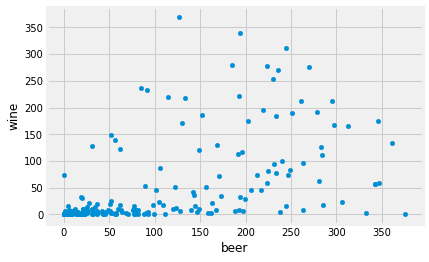

In [76]:
drinks.plot(kind='scatter', x='beer', y='wine');

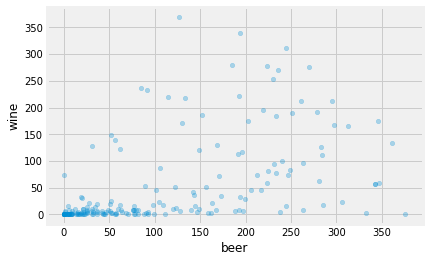

In [77]:
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3);

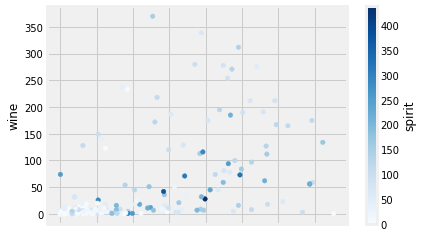

In [78]:
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues');

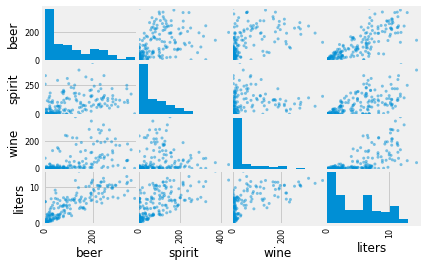

In [81]:
pd.plotting.scatter_matrix(drinks);

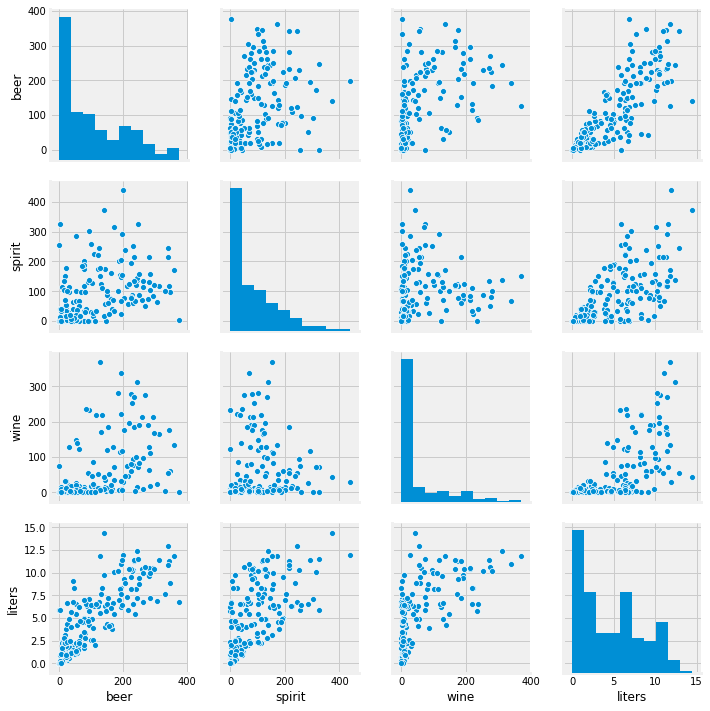

In [80]:
sns.pairplot(drinks)

#### Bar Charts

In [ ]:
#Univariate, count by categorical variable -- how is this different from a histogram?
drinks.continent.value_counts()

In [ ]:
# Use barh for horizontal
drinks.continent.value_counts().plot(kind='bar');

In [7]:
# Calculate the mean alcohol amounts for each continent.
#   -- also sum, count, max, min
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [13]:
drinks.groupby('continent').mean().reset_index()

,continent,beer,spirit,wine,liters
0,AF,61.471698,16.339623,16.264151,3.007547
1,AS,37.045455,60.840909,9.068182,2.170455
2,EU,193.777778,132.555556,142.222222,8.617778
3,OC,89.687500,58.437500,35.625000,3.381250
4,SA,175.083333,114.750000,62.416667,6.308333


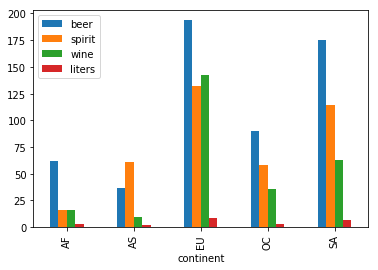

In [9]:
drinks.groupby('continent').mean().plot(kind='bar');

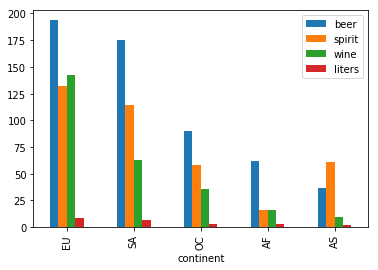

In [10]:
# That was sorted by continent -- sort by beer instead
drinks.groupby('continent').mean().sort_values('beer', ascending=False).plot(kind='bar');

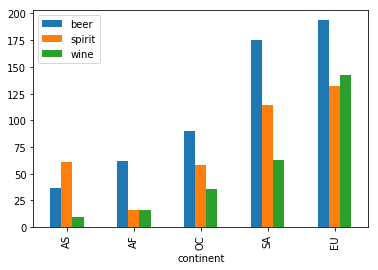

In [11]:
#  The liters column is out of scale, and it is not comparable to the others anyway!
#  Notice we make adjustments in the data frame, not by customizing the plot
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().drop('liters', axis=1).sort_values('beer').plot(kind='bar');

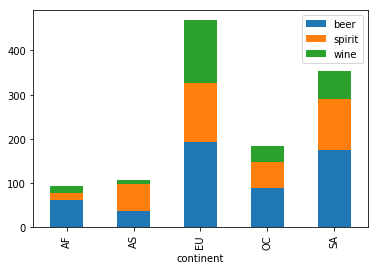

In [12]:
# Stacked bar plot (with the liters comparison removed)
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);